# Ahmet Burak Şişci

### üssel dağılımın bekenen değeri = 1/lambda

# t-distrubition (student distrubitoun )

### t-Dağılımı Nedir? (En Basit Tanım)
t-Dağılımı, Normal Dağılım'a (Çan Eğrisi) çok benzeyen, ancak kuyrukları daha kalın olan bir olasılık dağılımıdır.
Bu "kalın kuyruklar", onu daha temkinli ve gerçekçi bir model yapar.


### Neden Böyle Bir Dağılıma İhtiyaç Var?
İstatistikte amacımız genellikle küçük bir örneklemden yola çıkarak büyük bir popülasyon hakkında tahminler yapmaktır. Bu süreçte iki temel belirsizlikle karşılaşırız:
* Popülasyon Ortalamasını (μ) Bilmiyoruz: Bunu tahmin etmeye çalışırız.
* Popülasyon Standart Sapmasını (σ) Bilmiyoruz: Bu, verilerin gerçekte ne kadar dağınık olduğunu gösterir ve bunu da genellikle bilmeyiz.


# hoca şu an "sınavda grafik çizen kodu soracağım. bunu sorabilirim dedi." bu grafiğe bak

### t dağılım çizen grafik

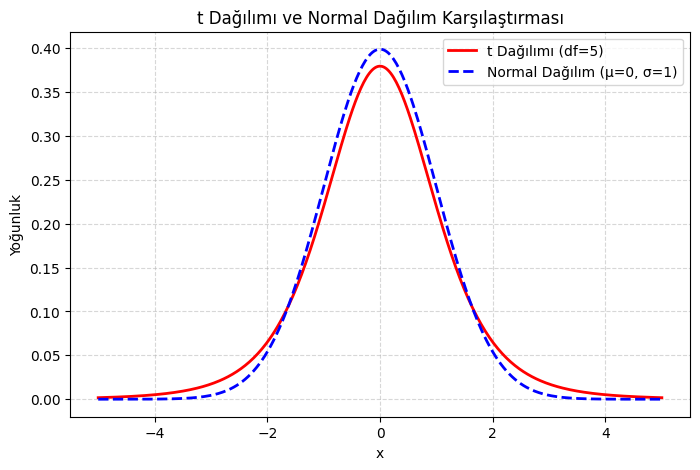

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Parametreler
df = 5  # t dağılımı serbestlik derecesi
x = np.linspace(-5, 5, 400)

# PDF'ler
t_pdf = t.pdf(x, df)
norm_pdf = norm.pdf(x, 0, 1)  # Ortalama 0, std 1

# Grafik
plt.figure(figsize=(8, 5))
plt.plot(x, t_pdf, 'r-', lw=2, label=f"t Dağılımı (df={df})")
plt.plot(x, norm_pdf, 'b--', lw=2, label="Normal Dağılım (μ=0, σ=1)")

plt.title("t Dağılımı ve Normal Dağılım Karşılaştırması")
plt.xlabel("x")
plt.ylabel("Yoğunluk")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Serbestlik derecesi (df), istatistikte temel bir kavramdır ve istatistiksel bir parametreyi tahmin etmek için kullanılabilen bağımsız değer veya bilgi parçalarının sayısını ifade eder.

    Küçük df: Sadece bir parmağını görerek tahmin yapmaya çalışmak gibidir. Tahmininiz çok geniş bir aralıkta ve oldukça belirsiz olacaktır.
    Büyük df: Arkadaşınızın yanında duran ve boyları bilinen 30 farklı kişiyi görerek tahmin yapmaya çalışmak gibidir. Elinizde çok daha fazla referans noktası (bilgi parçası) olduğu için tahmininiz çok daha isabetli ve daha dar bir aralıkta olacaktır.

* veri sayısı 30un üstne çıkınca normal dağılıma yaklaşır t dağılımı.
* serbestlik dereceği artınca daha iyi tshmin edebilirsn.

* df = 5: Bu, t-Dağılımı'nın şeklini belirleyecek olan serbestlik derecesini (degrees of freedom) ayarlar. df=5 demek, n=6 gibi küçük bir örneklemle çalışıldığını temsil eder. Bu, t-dağılımı ile normal dağılım arasındaki farkın belirgin olacağı bir değerdir.
* x = np.linspace(-5, 5, 400): Grafiğin x-ekseni için veri noktaları oluşturur. -5 ile +5 arasındaki aralığı, 400 eşit parçaya bölerek pürüzsüz bir çizgi çizilmesini sağlar.

* t_pdf = t.pdf(x, df): x eksenindeki her bir nokta için, serbestlik derecesi df=5 olan t-Dağılımı'nın olasılık yoğunluğunu hesaplar. Bu, kırmızı eğrinin y-değerlerini oluşturur.
* norm_pdf = norm.pdf(x, 0, 1): x eksenindeki her bir nokta için, ortalaması 0 ve standart sapması 1 olan Standart Normal Dağılım'ın olasılık yoğunluğunu hesaplar. Bu, mavi kesikli eğrinin y-değerlerini oluşturur.

* plt.figure(...): Çizilecek grafiğin boyutlarını ayarlar.
* plt.plot(x, t_pdf, ...): t-Dağılımı'nın grafiğini çizer.
    * 'r-': Kırmızı (red) ve düz çizgi (-).
    * lw=2: Çizgi kalınlığı (line width).
    * label=...: Grafiğin etiketini (legend) belirler.
* plt.plot(x, norm_pdf, ...): Normal Dağılım'ın grafiğini çizer.
* 'b--': Mavi (blue) ve kesikli çizgi (--).
* Geri Kalanlar: Grafiğe başlık, eksen isimleri, etiket kutusu (legend) ve kılavuz çizgileri (grid) ekleyerek daha okunaklı hale getirir.


### Ortaya Çıkan Grafiğin Yorumu
Bu kodu çalıştırdığınızda elde edeceğiniz grafik, iki dağılım arasındaki temel farkları çok net bir şekilde gösterir:
1. Tepe Noktası: Kırmızı çizginin (t-Dağılımı) tepe noktası, mavi kesikli çizginin (Normal Dağılım) tepe noktasından daha alçaktır.
2. Kuyruklar: Kırmızı çizginin kuyrukları (x-ekseninde -2'den küçük ve +2'den büyük olan kısımlar), mavi kesikli çizginin kuyruklarından daha yukarıdadır. Buna "daha kalın/ağır kuyruklar" (heavier tails) denir.


# örneklem boyutunun değişimi durumu nasıl etkiler

Örneklem boyutunun (`n`) küçük ya da büyük olması, istatistiksel analizin **güvenilirliğini ve gücünü** temelden etkileyen en önemli faktördür.

Durumu, bir okyanusun (popülasyon) suyunun tuzluluk oranını ölçmeye çalışmak gibi düşünebilirsiniz.

---

### Küçük Örneklem Boyutu (`n` küçük, örn: n < 30)

Bu, okyanustan sadece **bir bardak su** alıp onun tuzluluğunu ölçmeye benzer.

#### Etkileri:

1.  **Yüksek Belirsizlik ve Değişkenlik:**
    *   Aldığınız bir bardak su, şans eseri okyanusun geri kalanından daha tuzlu veya daha az tuzlu olabilir. Başka bir bardak aldığınızda sonuç çok farklı çıkabilir.
    *   **Sonuç:** Küçük örneklemlerden elde edilen sonuçlar (ortalama, standart sapma vb.) bir deneyden diğerine çok fazla **değişkenlik gösterir**.

2.  **Popülasyonu Temsil Etme Gücü Zayıftır:**
    *   Bir bardak su, tüm okyanusun genel durumunu doğru bir şekilde yansıtmayabilir. Örnekleminiz, popülasyonun gerçek yapısını (örneğin, dağılım şeklini, aykırı değerleri) yakalamakta yetersiz kalabilir.

3.  **Standart Hata (Standard Error) Büyüktür:**
    *   Standart Hata, örneklem ortalamasının popülasyon ortalamasından ne kadar uzakta olabileceğinin bir ölçüsüdür. Formülü `σ / √n`'dir. `n` küçük olduğunda, bu değer büyür.
    *   **Sonuç:** Örneklem ortalamanızın, popülasyonun gerçek ortalamasından oldukça uzakta olma ihtimali yüksektir.

4.  **t-Dağılımı Kullanma Zorunluluğu:**
    *   Popülasyon standart sapmasını bilmediğimiz (genellikle bilmeyiz) ve örneklemimiz küçük olduğu için, bu yüksek belirsizliği hesaba katan **t-dağılımını** kullanmak zorunda kalırız.
    *   **Sonuç:** Güven aralıkları **daha geniş** olur ("Tuzluluk oranı %2 ile %8 arasında" gibi çok geniş bir tahmin) ve istatistiksel bir fark bulmak **daha zorlaşır**.

**Kısacası: Küçük örneklem = Az bilgi = Yüksek belirsizlik = Geniş tahmin aralıkları = Zayıf sonuçlar.**

---

### Büyük Örneklem Boyutu (`n` büyük, örn: n > 30)

Bu, okyanustan **binlerce farklı noktadan tankerlerle su** alıp hepsinin ortalamasını almaya benzer.

#### Etkileri:

1.  **Düşük Belirsizlik ve Tutarlılık:**
    *   Binlerce farklı noktadan aldığınız su örneklerinin ortalaması, tekil şans etkilerini ortadan kaldırır ve çok daha tutarlı bir sonuç verir.
    *   **Sonuç:** Büyük örneklemlerden elde edilen sonuçlar çok daha **güvenilir ve tutarlıdır**.

2.  **Popülasyonu Temsil Etme Gücü Yüksektir:**
    *   Büyük bir örneklem, popülasyonun gerçek yapısını (dağılımı, çeşitliliği) çok daha iyi yansıtır. Şans eseri yanıltıcı bir sonuç alma ihtimaliniz azalır.

3.  **Standart Hata (Standard Error) Küçüktür:**
    *   `n` büyüdükçe, `σ / √n` formülündeki payda büyür ve standart hata değeri küçülür.
    *   **Sonuç:** Örneklem ortalamanızın, popülasyonun gerçek ortalamasına **çok yakın** olma ihtimali yüksektir.

4.  **Merkezi Limit Teoremi'nin Gücü:**
    *   Örneklem boyutu yeterince büyük olduğunda, **Merkezi Limit Teoremi** devreye girer. Bu teorem sayesinde, örneklem ortalamalarının dağılımının **Normal Dağılım'a** uyduğunu varsayabiliriz.
    *   **Sonuç:** Güven aralıkları **daha dar** olur ("Tuzluluk oranı %4.8 ile %5.2 arasında" gibi çok hassas bir tahmin) ve küçük farklılıkları bile istatistiksel olarak tespit etme gücümüz **artar**.

**Kısacası: Büyük örneklem = Çok bilgi = Düşük belirsizlik = Hassas tahminler = Güçlü sonuçlar.**

### Özet Tablo

| Özellik | Küçük Örneklem Boyutu | Büyük Örneklem Boyutu |
| :--- | :--- | :--- |
| **Güvenilirlik** | Düşük | **Yüksek** |
| **Belirsizlik** | Yüksek | **Düşük** |
| **Standart Hata** | Büyük | **Küçük** |
| **Güven Aralığı** | Geniş | **Dar** |
| **İstatistiksel Güç** | Düşük (farkları bulmak zor) | **Yüksek** (farkları bulmak kolay) |
| **Kullanılan Dağılım**| Genellikle **t-Dağılımı** | **Normal Dağılım (Z-dağılımı)** |

# farklı df ler iler normal değılıma yaklaşma durumunu ölçen grafik:

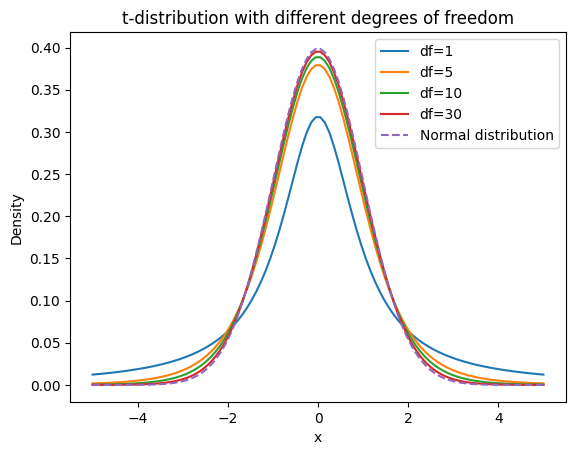

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-5, 5, 100)

# Plot for different degrees of freedom
for df in [1, 5, 10, 30]:
    plt.plot(x, stats.t.pdf(x, df), label=f'df={df}')

plt.plot(x, stats.norm.pdf(x), label='Normal distribution',
         linestyle='--')
plt.legend()
plt.title('t-distribution with different degrees of freedom')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

    linspace: belirli bir aralığı belirli bir sayıya böler.

# log normal distrubituon

**Log-Normal Dağılım (Log-Normal Distribution)**, ilk bakışta karmaşık gibi görünse de aslında Normal Dağılım ile çok yakın bir ilişkisi olan ve özellikle ekonomide, finansta ve birçok bilim dalında sıkça karşılaşılan önemli bir sürekli olasılık dağılımıdır.

### Log-Normal Dağılım Nedir? (En Basit Tanım)

Bir rastgele değişkenin **logaritması** Normal Dağılım'a uyuyorsa, o değişkenin kendisi **Log-Normal Dağılım'a** sahiptir.

Kısacası:
*   Eğer **`X`** Log-Normal dağılıyorsa,
*   O zaman **`Y = ln(X)`** Normal dağılır.

Bu ilişki, dağılımın tüm özelliklerini ve mantığını anlamanın anahtarıdır.

---

### Temel Özellikleri ve Görünümü

1.  **Pozitif Değerler Alır:**
    *   Logaritma fonksiyonu sadece pozitif sayılar için tanımlı olduğundan, Log-Normal dağılıma sahip bir değişken **asla negatif veya sıfır olamaz**. Değerleri her zaman `(0, ∞)` aralığındadır.
    *   Bu özellik, onu negatif değer alamayan ölçümler için mükemmel bir model yapar.

2.  **Pozitif Çarpıktır (Sağa Çarpık - Positively Skewed):**
    *   Grafiği simetrik değildir. Sol tarafta sıkışık bir şekilde başlar, hızla bir tepe noktasına ulaşır ve ardından sağa doğru yavaşça azalan **uzun bir kuyruk** oluşturur.
    *   Bu, küçük değerlerin daha sık görüldüğü, ancak ara sıra aşırı büyük değerlerin de ortaya çıkabildiği durumları modeller.

3.  **Ortalama, Medyan ve Mod Farklıdır:**
    *   Sağa çarpık olduğu için, bu üç merkezi eğilim ölçüsü birbirine eşit değildir. Genellikle şu sıralama geçerlidir:
        **Mod < Medyan < Ortalama**
    *   Aşırı büyük değerler (sağdaki kuyruk), ortalamayı medyanın ve modun sağına doğru çeker.

---

### Normal Dağılım ile İlişkisi (Pratikte Nasıl Kullanılır?)

Log-Normal dağılımın en güzel yanı, onu analiz etmenin çok kolay olmasıdır.

1.  **Dönüştür:** Elinizdeki Log-Normal dağılmış verilerin **doğal logaritmasını (`ln`)** alın.
2.  **Analiz Et:** Elde ettiğiniz yeni veri seti artık **Normal Dağılım'a** uyacaktır. Normal dağılım için bildiğiniz tüm analizleri (ortalama, standart sapma hesaplama, hipotez testleri vb.) bu dönüştürülmüş veri üzerinde yapabilirsiniz.
3.  **Geri Dönüştür:** Analiz sonucunda bulduğunuz değerleri (örneğin, bir tahminin güven aralığını), **üssel fonksiyonu (`exp`)** kullanarak tekrar orijinal ölçeğe çevirebilirsiniz.

**Özetle:** Log-Normal dağılım, **pozitif ve sağa çarpık** verileri modellemek için kullanılan çok güçlü bir araçtır. Adını, verilerin logaritması alındığında Normal Dağılım'a dönüşmesinden alır. Bu dönüşüm, karmaşık gibi görünen bu dağılımı, istatistiğin en iyi anlaşılan ve en kolay kullanılan aracı olan Normal Dağılım'a indirgeyerek analiz etmemizi sağlar.

    scale = ölçek parametresi (e^mean) büyük olduğunda sağa doğru genişler (dağılımın genişliğini belirler)

### log normal dağılım çizen grafik kodları

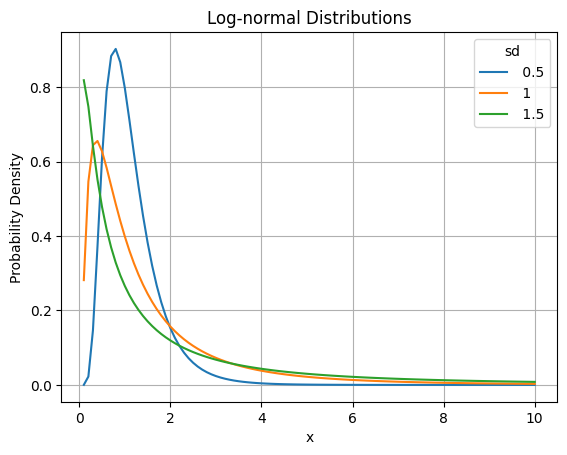

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# X ekseni için değerler
x = np.linspace(0.1, 10, 100)
"""
s=Standard sapma (log) -> logaritması alınırsa normal dağılım standart sapması olur
mean=Ortalama (log)
scale= Ölçek parametresi (e^mean) büyük olduğunda sağa doğru genişler (dağılımın genişliğini belirler)

Log-normal dağılım, bir değişkenin logaritması normal dağılım gösteriyorsa ortaya çıkar.
Yani, **eğer X log-normal dağılıma sahipse, log(X) normal bir dağılıma uyar**.
"""

# Farklı log-normal dağılımlar için parametreler
params = [
    {'s': 0.5, 'scale': np.exp(0)},  # dar
    {'s': 1, 'scale': np.exp(0)},  # Orta
    {'s': 1.5, 'scale': np.exp(0)},  # geniş
]

for param in params:
    pdf = lognorm.pdf(x, param['s'], loc=0, scale=param['scale'])
    plt.plot(x, pdf, label=f" {param['s']}")

# Grafik ayarları
plt.title('Log-normal Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend(title="sd")
plt.grid(True)
plt.show()

    eğer x log normal dağılıma sahipse log(x) normal değılıma sahiptir.

### daha kolay çizdirmenin bir yolu:

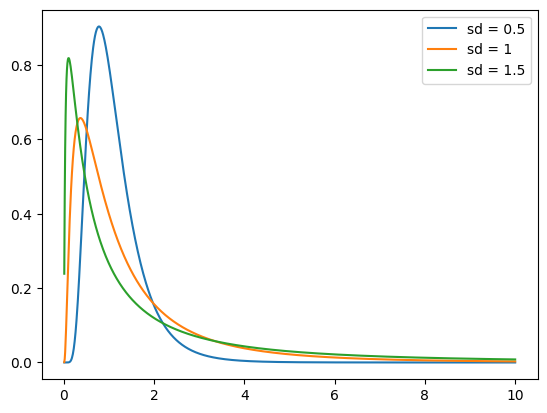

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

sd_values = [0.5, 1, 1.5]


x = np.linspace(0.01, 10, 1000)


for sd in sd_values:
    pdf = lognorm.pdf(x, sd)
    plt.plot(x, pdf, label=f'sd = {sd}')


plt.legend()
plt.show()

### Parametreleri Nelerdir?
scipy.stats.lognorm fonksiyonu, altta yatan Normal Dağılım'ın parametrelerini kullanır:
1. s (Şekil): Alttaki Normal Dağılım'ın standart sapmasıdır (σ). Dağılımın ne kadar çarpık olacağını belirler.
2. scale (Ölçek): Alttaki Normal Dağılım'ın ortalamasının üslü halidir (exp(μ)). Bu, Log-Normal dağılımın medyanına eşittir.


# hypothesis testi

### piyasada hipotes testi olmayan bir şey yok aslında. her şey hipotezdir.

örnek:

    bir ürününün fiyatını düşürmenin satışları artırması.
    web sitenini açılış ekranını değiştirirsem daha fazla kişi giriş yapar.
    ilaç değişikliğiinini anlamalı bir iyileşme sağlaması

**özetle: yaptığın iş anlamlı bie fark oluşuturu mu?**

popülasyonlar arasında anlamlı bir fark olmadığını varsayarak başlarısınıoz her zaman

hipoztez: elkimdeki dağılım ile normal dağılım arasında anlamalı bir fark yoktur. (elimde ki dağılım normaldir - biz buna yokluk hipotezi deinr. )

**bir hipotez yapacaksınız bir normal başlangıcınız olmalı. buna yokluk hipotezi , none hipotezi denir**

**verdiğin hipotezin tam karşıtı hipoteze "alternatif hipotez" denir.**

### opülasyonu tanıdıktan sonra yapılacaklar:
1. aşama1 none hipotezi oluşutr.
2. aşama2 alternatif hipotez oluştur
3. verileri topla ve hipotezi test et
4. popülasyon hakkında fikir edinmek için test sonuçlarını kullan. (popülasyona genelle)

### peki ne kadar veri kullnmam gerek?:

**örneklem sayısını kullnamak için çeşitli yöntemler vardır.** bu yöntemleri kullnaarak toplam popülasyona göre örneklem sayısı belirlenmeli.

eğer bu yöntem işlemezse önceki testlere bakarak onlara göre karar alınır.

ancak bilnmeli ilk yöntem daha etkili olur. akılcıdır.



### bağımlı ve bağımsız değişkenin ilişkisini görmek için saçılım grafiği kullanılır.

### deneyler kaç türklü olabilir:
1. kontrollü deney
    * katılımcılar rastegele gruplaara atılır. biri kontrol biri tedavi grubu.
    * (katılımcının rastgele gruplanması önemli)
    * bir ilaç için düşünürsek, iki grubada ilacı vermeelisin. biri gelişrtirdiğin ilaç diğeri plesebo ilaç olmalı. insanlar hangi ilacı kullandığını bilmediği için önyargı geliştiremez.
        * çift kör bir dedneyde sende hangi ilacın hangi geuba gittiğini bilemezsin. böylece deneyi yöneten sen bile ön yargı geliştiremezsin. bu daha iyi bie deney ortamı sağlar.
    * proje değerlendiren hakemler çift kör çalışır. hakem ve proje sahibi birbirini tanımaz. böylece torpilin önüne geçilir.
        * proje isimleri silinirken içieriğindeki meta datalar silinmeyi unutulabilir. bu çift körlüğe zarar verir.

**deneylerin altın standartı: deneylerde ön yargı olmamalı.**
   

2. gözlemsel çalışmalar
    * burada rastgele atama olmaz
    * örneğin, sigara içen bir grup için araştırma yapıyorsanız sigara kullnamayanları elemeniz gerekir. rastgele yapılmaz.

3. uzunlamasına ve kesitsel çalışmalar

### 1. Kontrollü Deney (Controlled Experiment)

*   **Ne Yapar?** Araştırmacı, bir değişkenin (neden) başka bir değişken (sonuç) üzerindeki etkisini ölçmek için koşulları **aktif olarak değiştirir** ve kontrol eder.
*   **Anahtar Kelime:** **Müdahale.**
*   **Örnek:** Yeni bir ilacın etkinliğini test etmek için, bir gruba gerçek ilaç (deney grubu), diğer gruba ise sahte ilaç (kontrol grubu) verilir ve sonuçlar karşılaştırılır.

---

### 2. Gözlemsel Çalışma (Observational Study)

*   **Ne Yapar?** Araştırmacı, olaylara veya deneklere **hiçbir müdahalede bulunmadan** sadece gözlem yapar, veri toplar ve ilişkileri analiz eder.
*   **Anahtar Kelime:** **Gözlem.**
*   **Örnek:** Sigara içenler ile içmeyenlerin sağlık durumlarını yıllarca takip ederek, sigaranın hastalıklarla olan ilişkisini incelemek. (Kimseye "sigara iç" veya "içme" denmez).

---

### 3. Uzunlamasına Çalışma (Longitudinal Study)

*   **Ne Yapar?** Aynı denek grubunu **uzun bir zaman dilimi boyunca** tekrar tekrar gözlemleyerek veya ölçerek verilerin zaman içindeki değişimini inceler.
*   **Anahtar Kelime:** **Zaman İçinde Takip.**
*   **Örnek:** Bir grup çocuğun doğumdan yetişkinliğe kadar olan zeka gelişimini her iki yılda bir test yaparak incelemek.

---

### 4. Kesitsel Çalışma (Cross-Sectional Study)

*   **Ne Yapar?** Farklı gruplardan (örneğin, farklı yaş grupları) denekleri, **tek bir zaman noktasında** gözlemleyerek veya ölçerek verileri karşılaştırır.
*   **Anahtar Kelime:** **Anlık Fotoğraf.**
*   **Örnek:** Bugün, 20, 40 ve 60 yaşlarındaki üç farklı insan grubunun teknoloji kullanım alışkanlıklarını anketle karşılaştırmak.

# kolerasyon (ilişki):
iki değişken arasında ilişki olup olmadığını , varsa bunun yönünü ölçmek için kullanılır.

### Korelasyon (Correlation)

*   **Nedir?** İki değişken arasındaki **ilişkinin yönünü ve gücünü** gösteren istatistiksel bir ölçüdür.
*   **Ne Anlatır?** Bir değişken artarken, diğerinin artma mı, azalma mı, yoksa hiç değişmeme mi eğiliminde olduğunu söyler.
*   **Değeri:** -1 ile +1 arasında bir sayı alır.
    *   **+1 (Pozitif Korelasyon):** Mükemmel pozitif ilişki. Biri artarken diğeri de artar (örn: boy ve kilo).
    *   **-1 (Negatif Korelasyon):** Mükemmel negatif ilişki. Biri artarken diğeri azalır (örn: rakım ve sıcaklık).
    *   **0 (Sıfır Korelasyon):** İlişki yok. Değişkenler arasında bir bağlantı bulunmaz (örn: ayakkabı numarası ve IQ).

**Önemli Not:** Korelasyon, **neden-sonuç ilişkisi anlamına gelmez!** Sadece bir bağlantı olduğunu gösterir.

---

### Saçılım Diyagramı (Scatter Diagram/Plot)

*   **Nedir?** İki sayısal değişken arasındaki ilişkiyi görselleştirmek için kullanılan bir grafiktir.
*   **Ne Yapar?** Her bir veri noktasını, x ve y eksenlerinde iki değişkenin değerlerine karşılık gelen bir nokta olarak çizer.
*   **Ne Anlatır?** Grafikteki noktaların genel dağılımına bakarak, iki değişken arasındaki korelasyon hakkında hızlıca bir fikir ediniriz:
    *   **Yukarı Doğru Giden Noktalar:** Pozitif korelasyon.
    *   **Aşağı Doğru Giden Noktalar:** Negatif korelasyon.
    *   **Dağınık, Belirgin Bir Yönü Olmayan Noktalar:** Sıfıra yakın korelasyon.

---

### **Özetle:** Saçılım diyagramı, korelasyonu **gözümüzle görmemizi** sağlayan grafiktir. Korelasyon ise bu görsel ilişkinin **sayısal değeridir**.

### pearson kolerasyon katsayısı:
iki değişken arasındaki ilişkinini gücünü ölçer.

**Pearson Korelasyon Katsayısı (r)**, iki sayısal değişken arasındaki **doğrusal (lineer) ilişkinin yönünü ve gücünü** ölçen, -1 ile +1 arasında bir değerdir.

*   **Ne Ölçer?** Veri noktalarının bir doğru etrafında ne kadar sıkı toplandığını.
*   **+1'e Yakınsa:** Güçlü pozitif doğrusal ilişki (biri artarken diğeri de artar).
*   **-1'e Yakınsa:** Güçlü negatif doğrusal ilişki (biri artarken diğeri azalır).
*   **0'a Yakınsa:** Doğrusal bir ilişki yok demektir.

**En Önemli Özelliği:** Sadece **doğrusal** (düz bir çizgiye benzer) ilişkileri ölçer. Eğrisel ilişkileri yakalayamaz.

### sign:

**`sign`** (işaret) fonksiyonu, bir sayının **pozitif mi, negatif mi, yoksa sıfır mı** olduğunu söyler.

*   Sayı **pozitifse** → **+1** döndürür.
*   Sayı **negatifse** → **-1** döndürür.
*   Sayı **sıfırsa** → **0** döndürür.

Kısacası, sayının değerini değil, sadece **işaretini** verir.

### zayıf ve güçlü kolerasyon için saçılım grafiği:
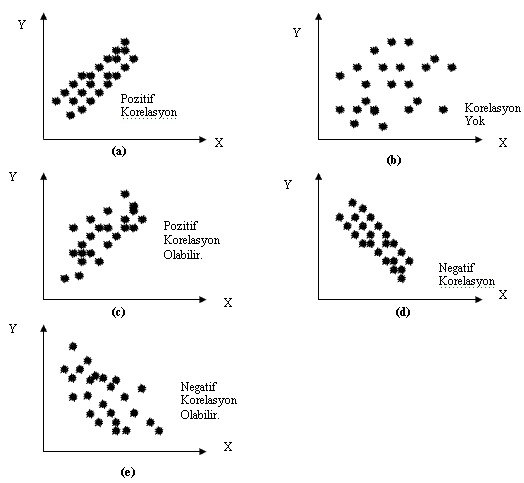![image.png](attachment:cce865ff-40d2-4925-9a0f-516e3f05bb7f.png)![image.png](attachment:0abb46ce-7caa-4ff2-9a33-bbc27a6c24f8.png)

![image.png](attachment:1a13090c-93d1-4d71-b823-1054fb923c65.png)![image.png](attachment:33f9d36c-e4a2-4a16-842b-b7fc97bdb7aa.png)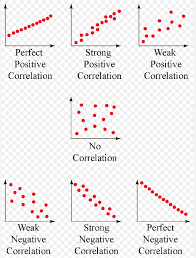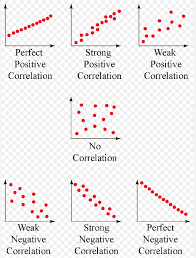

# hoca şimdi diyore ki "oturun iş yapın. kod yazın. yoksa öğrenemzsiniz."